# Análisis exploratorio de datos sobre el *dataset* preprocesado

Con la finalidad de analizar la existencia de dependencias entre las variables del *dataset*, para tener así un mayor entendimiento de los datos antes de aplicar los algoritmos de Aprendizaje Automático, se ha realizado un análisis exploratorio (EDA) de las características predictoras basadas en los parámetros espaciotemporales y cinemáticos de la marcha contenidos en el conjunto de datos.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt


# to make this notebook's output stable across runs
RANDOM_SEED = 42
TEST_SIZE = 0.33
np.random.seed(RANDOM_SEED)
POSITIVE_CLASS = 'lap2'
dataset_path = "D:/dataset/optitrack/"


#http://aeturrell.com/2018/01/31/publication-quality-plots-in-python/
#plt.style.use('plot_style.txt')


colors =["cornflowerblue", "lightcoral"]

In [2]:
def save_fig(fig_id, out_dir, tight_layout=True, fig_extension="png", resolution=1200):
    path = os.path.join(out_dir, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#http://aeturrell.com/2018/01/31/publication-quality-plots-in-python/

## Carga de datos

In [3]:
spatiotemporal = pd.read_csv(os.path.join(dataset_path, 'spatiotemporal.csv'))
kinematics = pd.read_csv(os.path.join(dataset_path, 'kinematics.csv'))
summary = pd.read_excel(os.path.join(dataset_path, 'summary.xlsx'), usecols= ["subject", "record", "label"])

In [4]:
discarded_records = [
    {'subject': 'subject_07', 'record': 'rec_03'},
    {'subject': 'subject_10', 'record': 'rec_05'},
]

for rec in discarded_records:
    print(rec['subject'])
    kinematics = kinematics.drop(kinematics[(kinematics.subject == rec['subject']) 
                                            & (kinematics.record == rec['record'])].index)
    spatiotemporal = spatiotemporal.drop(spatiotemporal[(spatiotemporal.subject == rec['subject']) 
                                            & (spatiotemporal.record == rec['record'])].index)

subject_07
subject_10


###  Añadir etiquetas

In [5]:
spatiotemporal = pd.merge(summary, spatiotemporal, on=["subject", "record"])
spatiotemporal

,subject,record,label,right_stride_length_norm,left_stride_length_norm,right_step_length_norm,left_step_length_norm,base_of_support_norm,right_heel_height_norm,left_heel_height_norm,...,right_stride_duration,left_stride_duration,right_double_support_percent,left_double_support_percent,right_step_angle,left_step_angle,right_toe_off_angle,left_toe_off_angle,right_strike_angle,left_strike_angle
0,subject_01,rec_01,norm,1.183,1.199,0.581,0.641,0.145,0.862,0.861,...,1.37,1.36,24.09,23.59,7.59,23.55,21.03,21.15,68.97,68.85
1,subject_01,rec_02,norm,1.208,1.219,0.575,0.658,0.141,0.866,0.875,...,1.32,1.31,24.70,24.39,6.51,19.06,25.02,18.65,64.98,71.35
2,subject_01,rec_03,norm,1.134,1.154,0.550,0.619,0.144,0.840,0.848,...,1.38,1.36,25.52,25.04,18.61,8.40,21.66,19.23,68.34,70.77
3,subject_01,rec_04,norm,1.147,1.150,0.552,0.615,0.139,0.820,0.847,...,1.36,1.35,23.73,22.98,4.87,18.00,20.53,19.20,69.47,70.80
4,subject_01,rec_05,norm,1.128,1.134,0.542,0.610,0.145,0.822,0.846,...,1.35,1.35,24.25,24.64,6.02,6.16,22.64,18.52,67.36,71.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,subject_10,rec_13,lap4,0.385,0.385,0.097,0.480,0.047,0.014,0.295,...,1.93,1.91,38.65,37.85,9.88,25.08,6.33,2.00,83.67,88.00
164,subject_10,rec_14,dc,0.349,0.391,0.153,0.234,0.123,0.157,0.187,...,2.59,2.87,51.83,55.72,8.03,2.76,4.23,4.56,85.77,85.44
165,subject_10,rec_15,dc,0.435,0.435,0.227,0.208,0.110,0.272,0.194,...,2.34,2.24,47.40,46.23,10.53,3.67,5.47,5.74,84.53,84.26
166,subject_10,rec_16,pm,0.410,0.384,0.034,0.385,0.463,0.186,0.341,...,1.35,1.35,25.52,25.34,13.43,24.59,7.21,2.70,82.79,87.30


In [6]:
kinematics = pd.merge(summary, kinematics, on=["subject", "record"])
kinematics

,subject,record,label,right_pelvis_tilt_Min,right_pelvis_tilt_Max,right_pelvis_tilt_Range,right_pelvis_tilt_Mean,right_pelvis_tilt_Stride_Start,right_pelvis_tilt_Stride_End,right_pelvis_tilt_Swing_Angle,...,right_foot_rotation_Stride_Start,right_foot_rotation_Stride_End,right_foot_rotation_Swing_Angle,left_foot_rotation_Min,left_foot_rotation_Max,left_foot_rotation_Range,left_foot_rotation_Mean,left_foot_rotation_Stride_Start,left_foot_rotation_Stride_End,left_foot_rotation_Swing_Angle
0,subject_01,rec_01,norm,7.585,11.670,4.085,9.747,10.795,9.916,9.740,...,-17.899,-13.335,-5.208,-9.810,16.455,26.265,2.786,-4.685,-5.102,13.976
1,subject_01,rec_02,norm,7.857,12.011,4.154,9.969,11.039,10.125,9.963,...,-15.165,-8.896,-3.928,-8.544,18.301,26.846,3.412,-1.125,-1.251,14.083
2,subject_01,rec_03,norm,8.434,12.314,3.880,10.585,11.576,10.821,10.076,...,-16.759,-13.414,-6.287,-7.348,16.711,24.059,3.307,-0.666,1.724,11.967
3,subject_01,rec_04,norm,8.098,11.983,3.885,10.074,11.064,10.307,10.059,...,-13.697,-9.607,-5.078,-8.449,19.604,28.053,3.366,-0.749,-1.173,14.858
4,subject_01,rec_05,norm,8.118,12.012,3.894,10.204,11.110,10.920,9.955,...,-14.112,-10.002,-7.931,-6.522,19.394,25.915,3.760,0.452,4.191,12.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,subject_10,rec_13,lap4,8.261,15.983,7.722,11.770,10.472,10.837,9.977,...,-0.704,-0.738,-11.132,-19.370,2.087,21.458,-7.801,-6.772,-7.338,-6.198
164,subject_10,rec_14,dc,8.712,12.413,3.701,10.401,10.749,10.875,10.239,...,-4.325,-4.473,-5.086,-9.331,4.601,13.932,-2.612,0.391,-0.596,1.189
165,subject_10,rec_15,dc,-30.859,-26.715,4.144,-29.058,-28.109,-28.392,-29.743,...,-3.468,-4.931,-5.610,-10.937,-1.046,9.890,-6.173,-4.737,-5.027,-3.175
166,subject_10,rec_16,pm,17.200,20.443,3.243,18.710,19.253,19.225,18.181,...,12.158,11.677,8.058,1.027,19.026,18.000,10.492,10.268,9.154,11.758


In [7]:
spatiotemporal.columns

Index(['subject', 'record', 'label', 'right_stride_length_norm',
       'left_stride_length_norm', 'right_step_length_norm',
       'left_step_length_norm', 'base_of_support_norm',
       'right_heel_height_norm', 'left_heel_height_norm',
       'right_toe_height_norm', 'left_toe_height_norm',
       'com_vertical_displacement_norm', 'com_horizontal_displacement_norm',
       'speed_norm', 'cadence_norm', 'right_stance_phase_duration_norm',
       'right_swing_phase_duration_norm', 'left_stance_phase_duration_norm',
       'left_swing_phase_duration_norm', 'right_double_support_duration_norm',
       'left_double_support_duration_norm', 'left_step_duration_norm',
       'right_step_duration_norm', 'gait_time', 'right_stance_percent',
       'right_swing_phase_percent', 'left_stance_percent',
       'left_swing_phase_percent', 'right_stride_duration',
       'left_stride_duration', 'right_double_support_percent',
       'left_double_support_percent', 'right_step_angle', 'left_step_angle

## Análisis exploratorio de las variables cinemáticas

In [8]:
variables = ['right_stride_length_norm', 'label',
       'left_stride_length_norm', 'right_step_length_norm',
       'left_step_length_norm', 'base_of_support_norm',
       'right_heel_height_norm', 'left_heel_height_norm',
       'right_toe_height_norm', 'left_toe_height_norm',
       'com_vertical_displacement_norm', 'com_horizontal_displacement_norm',
             'right_double_support_duration_norm',
       'left_double_support_duration_norm', 'left_step_duration_norm',
       'right_step_duration_norm', 'right_stance_percent',
       'right_swing_phase_percent', 'left_stance_percent',
       'left_swing_phase_percent',  'right_double_support_percent',
       'left_double_support_percent', 'right_step_angle', 'left_step_angle',
       'right_toe_off_angle', 'left_toe_off_angle', 'right_strike_angle',
       'left_strike_angle']

In [9]:
spatiotemporal.loc[spatiotemporal.label == 'norm', variables].describe().T[['mean', 'std']].round(2)

,mean,std
right_stride_length_norm,1.09,0.09
left_stride_length_norm,1.09,0.11
right_step_length_norm,0.52,0.06
left_step_length_norm,0.59,0.05
base_of_support_norm,0.13,0.02
right_heel_height_norm,0.80,0.07
left_heel_height_norm,0.79,0.07
right_toe_height_norm,0.32,0.03
left_toe_height_norm,0.33,0.04
com_vertical_displacement_norm,0.13,0.01


In [10]:
spatiotemporal.loc[spatiotemporal.label == 'lap1', variables].describe().T[['mean', 'std']]

,mean,std
right_stride_length_norm,0.55795,0.097018
left_stride_length_norm,0.54370,0.088929
right_step_length_norm,0.52375,0.090442
left_step_length_norm,0.04860,0.028246
base_of_support_norm,0.18455,0.028515
right_heel_height_norm,0.53480,0.096636
left_heel_height_norm,0.12500,0.080776
right_toe_height_norm,0.06410,0.034265
left_toe_height_norm,0.33585,0.046354
com_vertical_displacement_norm,0.14155,0.039532


In [11]:
st_means = spatiotemporal[variables].groupby('label').mean().T.round(2).reset_index()
st_stds = spatiotemporal[variables].groupby('label').std().T.round(2).reset_index()
st_stds

label,index,dc,lap1,lap2,lap3,lap4,norm,pm
0,right_stride_length_norm,0.13,0.10,0.10,0.23,0.23,0.09,0.24
1,left_stride_length_norm,0.19,0.09,0.12,0.21,0.23,0.11,0.25
2,right_step_length_norm,0.11,0.09,0.03,0.12,0.09,0.06,0.13
3,left_step_length_norm,0.11,0.03,0.10,0.10,0.14,0.05,0.11
4,base_of_support_norm,0.03,0.03,0.01,0.03,0.03,0.02,0.07
5,right_heel_height_norm,0.18,0.10,0.13,0.14,0.20,0.07,0.19
6,left_heel_height_norm,0.19,0.08,0.12,0.17,0.12,0.07,0.18
7,right_toe_height_norm,0.06,0.03,0.08,0.03,0.10,0.03,0.09
8,left_toe_height_norm,0.07,0.05,0.04,0.10,0.03,0.04,0.08
9,com_vertical_displacement_norm,0.03,0.04,0.05,0.07,0.09,0.01,0.03


In [12]:
st_stats = pd.merge(st_means, st_stds, on="index").reset_index()
st_stats['norm'] = st_stats.apply(lambda row: str(row.norm_x) + " + " + str(row.norm_y) , axis=1)
st_stats['lap1'] = st_stats.apply(lambda row: str(row.lap1_x) + " + " + str(row.lap1_y) , axis=1)
st_stats['lap2'] = st_stats.apply(lambda row: str(row.lap2_x) + " + " + str(row.lap2_y) , axis=1)
st_stats['lap3'] = st_stats.apply(lambda row: str(row.lap3_x) + " + " + str(row.lap3_y) , axis=1)
st_stats['lap4'] = st_stats.apply(lambda row: str(row.lap4_x) + " + " + str(row.lap4_y) , axis=1)
st_stats['dc'] = st_stats.apply(lambda row: str(row.dc_x) + " + " + str(row.dc_y) , axis=1)
st_stats['pm'] = st_stats.apply(lambda row: str(row.pm_x) + " + " + str(row.pm_y) , axis=1)

In [13]:
st_stats[["index", "norm", "lap1", "lap2", "lap3", "lap4", "dc", "pm"]]

label,index,norm,lap1,lap2,lap3,lap4,dc,pm
0,right_stride_length_norm,1.09 + 0.09,0.56 + 0.1,0.56 + 0.1,0.62 + 0.23,0.65 + 0.23,0.44 + 0.13,0.5 + 0.24
1,left_stride_length_norm,1.09 + 0.11,0.54 + 0.09,0.59 + 0.12,0.59 + 0.21,0.66 + 0.23,0.47 + 0.19,0.5 + 0.25
2,right_step_length_norm,0.52 + 0.06,0.52 + 0.09,0.06 + 0.03,0.5 + 0.12,0.13 + 0.09,0.2 + 0.11,0.15 + 0.13
3,left_step_length_norm,0.59 + 0.05,0.05 + 0.03,0.61 + 0.1,0.12 + 0.1,0.6 + 0.14,0.32 + 0.11,0.37 + 0.11
4,base_of_support_norm,0.13 + 0.02,0.18 + 0.03,0.07 + 0.01,0.19 + 0.03,0.09 + 0.03,0.13 + 0.03,0.39 + 0.07
5,right_heel_height_norm,0.8 + 0.07,0.53 + 0.1,0.18 + 0.13,0.35 + 0.14,0.28 + 0.2,0.31 + 0.18,0.37 + 0.19
6,left_heel_height_norm,0.79 + 0.07,0.12 + 0.08,0.57 + 0.12,0.21 + 0.17,0.39 + 0.12,0.32 + 0.19,0.36 + 0.18
7,right_toe_height_norm,0.32 + 0.03,0.06 + 0.03,0.35 + 0.08,0.04 + 0.03,0.33 + 0.1,0.11 + 0.06,0.13 + 0.09
8,left_toe_height_norm,0.33 + 0.04,0.34 + 0.05,0.07 + 0.04,0.31 + 0.1,0.04 + 0.03,0.1 + 0.07,0.12 + 0.08
9,com_vertical_displacement_norm,0.13 + 0.01,0.14 + 0.04,0.15 + 0.05,0.15 + 0.07,0.16 + 0.09,0.07 + 0.03,0.09 + 0.03


Saving figure eda-barras


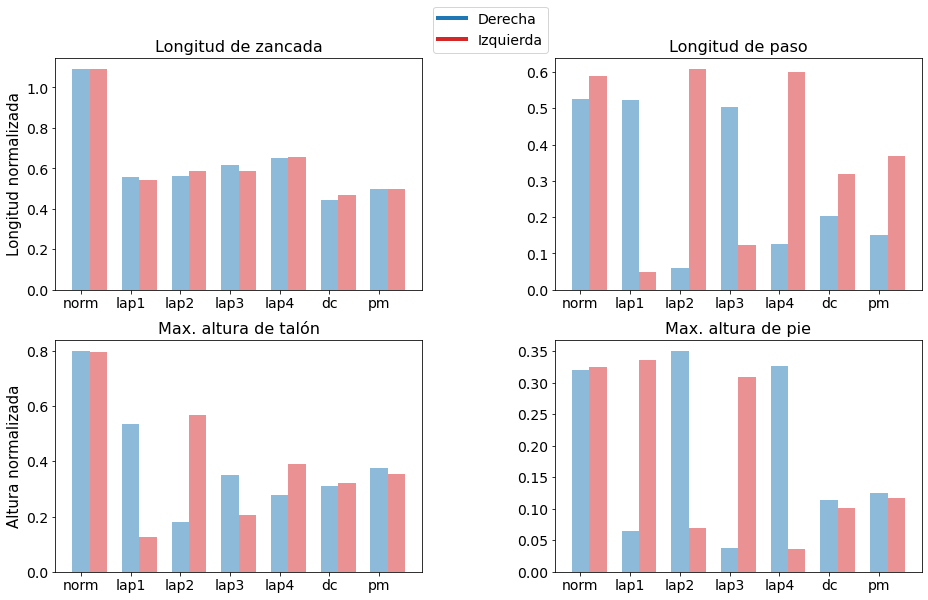

In [14]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(2, 2, figsize=(13, 8.5), )
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

labels = spatiotemporal['label'].unique()

right_stride_lenghts = []
right_step_lenghts = []
left_stride_lenghts = []
left_step_lenghts  = []
right_heel_heights = []
left_heel_heights  = []
right_toe_heights = []
left_toe_heights  = []

for label in labels:
    right_stride_lenght = spatiotemporal.loc[spatiotemporal.label == label, 'right_stride_length_norm'].mean()
    right_step_lenght = spatiotemporal.loc[spatiotemporal.label == label, 'right_step_length_norm'].mean()
    right_stride_lenghts.append(right_stride_lenght)
    right_step_lenghts.append(right_step_lenght)
    
    left_stride_lenght = spatiotemporal.loc[spatiotemporal.label == label, 'left_stride_length_norm'].mean()
    left_step_lenght = spatiotemporal.loc[spatiotemporal.label == label, 'left_step_length_norm'].mean()
    left_stride_lenghts.append(left_stride_lenght)
    left_step_lenghts.append(left_step_lenght)
    
    right_heel_height = spatiotemporal.loc[spatiotemporal.label == label, 'right_heel_height_norm'].mean()
    left_heel_height = spatiotemporal.loc[spatiotemporal.label == label, 'left_heel_height_norm'].mean()
    right_heel_heights.append(right_heel_height)
    left_heel_heights.append(left_heel_height)
    
    right_toe_height = spatiotemporal.loc[spatiotemporal.label == label, 'right_toe_height_norm'].mean()
    left_toe_height = spatiotemporal.loc[spatiotemporal.label == label, 'left_toe_height_norm'].mean()
    right_toe_heights.append(right_toe_height)
    left_toe_heights.append(left_toe_height)
    

left_color = "tab:red" # 214. 39. 40. (RGB)    #d62727
right_color = "tab:blue" # 21. 119. 180. (RGB) #1577b4
    
index = np.arange(len(labels))
bar_width = 0.35
opacity = 0.5

# Gráfico 1: longitud de zancada izquierda y derecha
rects1 = ax1.bar(labels, right_stride_lenghts, bar_width,
alpha=opacity,
color=right_color,
label='Derecha')
rects2 = ax1.bar(index + bar_width, left_stride_lenghts, bar_width,
alpha=opacity,
color=left_color,
label='Izquierda')

ax1.set_title('Longitud de zancada', fontsize=16)
ax1.set_ylabel('Longitud normalizada', fontsize=15)
ax1.tick_params(axis="both", labelsize=14)


# Gráfico 2: Longitud de paso izquierdo y derecho
rects1 = ax2.bar(labels, right_step_lenghts, bar_width,
alpha=opacity,
color=right_color,
label='Derecha')
rects2 = ax2.bar(index + bar_width, left_step_lenghts, bar_width,
alpha=opacity,
color=left_color,
label='Izquierda')

ax2.set_title('Longitud de paso', fontsize=16)
ax2.tick_params(axis="both", labelsize=14)


# Gráfico 3: Altura máxima del talón
rects1 = ax3.bar(labels, right_heel_heights, bar_width,
alpha=opacity,
color=right_color,
label='Derecha')
rects2 = ax3.bar(index + bar_width, left_heel_heights, bar_width,
alpha=opacity,
color=left_color,
label='Izquierda')

ax3.set_ylabel('Altura normalizada', fontsize=15)
ax3.set_title('Max. altura de talón', fontsize=16)
ax3.tick_params(axis="both", labelsize=14)


# Gráfico 4: Altura máxima del pie
rects1 = ax4.bar(labels, right_toe_heights, bar_width,
alpha=opacity,
color=right_color,
label='Derecha')
rects2 = ax4.bar(index + bar_width, left_toe_heights, bar_width,
alpha=opacity,
color=left_color,
label='Izquierda')

ax4.set_title('Max. altura de pie', fontsize=16)
ax4.tick_params(axis="both", labelsize=14)


custom_lines = [Line2D([0], [0], color= right_color, lw=4),
                Line2D([0], [0], color=left_color, lw=4)]


fig.subplots_adjust(wspace=1, hspace=2)

ax2.legend(custom_lines, ['Derecha', 'Izquierda'],  bbox_to_anchor=(0, 1.25), prop={'size': 14},)
fig.tight_layout()

save_fig("eda-barras", "./", tight_layout=True, fig_extension="pdf")


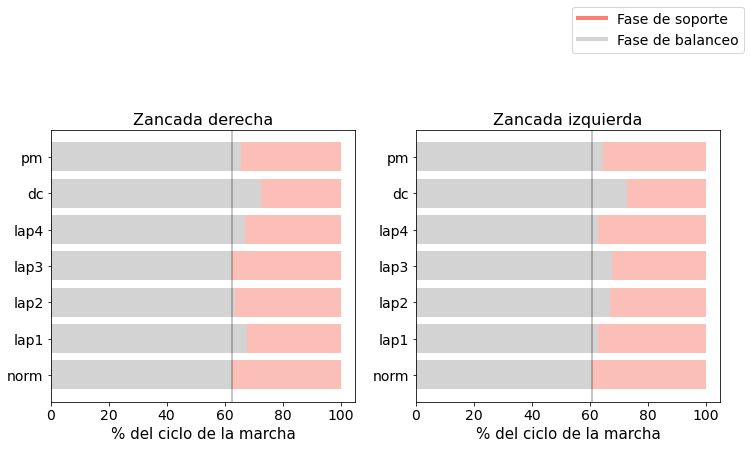

In [15]:
from matplotlib.lines import Line2D

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

right_stance_percents = []
right_swing_percents = []
left_stance_percents = []
left_swing_percents = []
for label in labels:
    right_stance_percent = spatiotemporal.loc[spatiotemporal.label == label, 'right_stance_percent'].mean()
    right_swing_percent = spatiotemporal.loc[spatiotemporal.label == label, 'right_swing_phase_percent'].mean()
    right_stance_percents.append(right_stance_percent)
    right_swing_percents.append(right_swing_percent + right_stance_percent)
    left_stance_percent = spatiotemporal.loc[spatiotemporal.label == label, 'left_stance_percent'].mean()
    left_swing_percent = spatiotemporal.loc[spatiotemporal.label == label, 'left_swing_phase_percent'].mean()
    left_stance_percents.append(left_stance_percent)
    left_swing_percents.append(left_swing_percent + left_stance_percent)

ax1.barh(labels, right_swing_percents,  color='salmon', alpha=0.5)
ax1.barh(labels, right_stance_percents, color='lightgray', align='center',alpha=1)
ax1.axvline(x=spatiotemporal.loc[spatiotemporal.label == 'norm', 'right_stance_percent'].mean(), alpha=0.3, c='black')


ax2.barh(labels, left_swing_percents,  color='salmon', alpha=0.5)
ax2.barh(labels, left_stance_percents, color='lightgray', align='center',alpha=1)
ax2.axvline(x=spatiotemporal.loc[spatiotemporal.label == 'norm', 'left_stance_percent'].mean(), alpha=0.3, c='black')

ax1.set_title('Zancada derecha', fontsize=16)
ax2.set_title('Zancada izquierda', fontsize=16)
ax1.set_xlabel('% del ciclo de la marcha', fontsize=15)
ax2.set_xlabel('% del ciclo de la marcha', fontsize=15)
ax1.tick_params(axis="both", labelsize=14)
ax2.tick_params(axis="both", labelsize=14)


custom_lines = [Line2D([0], [0], color="salmon", lw=4),
                Line2D([0], [0], color= "lightgray", lw=4)]
ax2.legend(custom_lines, ['Fase de soporte', 'Fase de balanceo',], loc='upper left', bbox_to_anchor=(0.49, 1.48), prop={'size': 14})

## Rendimiento de los modelos

In [17]:
results5 = [
    {'item': 'lap1', 'algoritmo': 'CNB', 'acc': 100.00},
    {'item': 'lap1', 'algoritmo': 'KNN', 'acc': 100.00},
    {'item': 'lap1', 'algoritmo': 'DT', 'acc': 91.30},
    {'item': 'lap1', 'algoritmo': 'SVC', 'acc': 100.00},
    {'item': 'lap1', 'algoritmo': 'MLP', 'acc': 69.57},
    
    {'item': 'lap2', 'algoritmo': 'CNB', 'acc': 56.52},
    {'item': 'lap2', 'algoritmo': 'KNN', 'acc': 100.00},
    {'item': 'lap2', 'algoritmo': 'DT', 'acc': 100.00},
    {'item': 'lap2', 'algoritmo': 'SVC', 'acc': 100.00},
    {'item': 'lap2', 'algoritmo': 'MLP', 'acc': 69.57},
    
    {'item': 'lap3', 'algoritmo': 'CNB', 'acc': 47.83},
    {'item': 'lap3', 'algoritmo': 'KNN', 'acc': 100.00},
    {'item': 'lap3', 'algoritmo': 'DT', 'acc': 100.00},
    {'item': 'lap3', 'algoritmo': 'SVC', 'acc': 100.0},
    {'item': 'lap3', 'algoritmo': 'MLP', 'acc': 69.57},
    
    {'item': 'lap4', 'algoritmo': 'CNB', 'acc': 91.30},
    {'item': 'lap4', 'algoritmo': 'KNN', 'acc': 100.00},
    {'item': 'lap4', 'algoritmo': 'DT', 'acc': 91.30},
    {'item': 'lap4', 'algoritmo': 'SVC', 'acc': 100.00},
    {'item': 'lap4', 'algoritmo': 'MLP', 'acc': 95.65},
    
    {'item': 'dc', 'algoritmo': 'CNB', 'acc': 100.00},
    {'item': 'dc', 'algoritmo': 'KNN', 'acc': 100.00},
    {'item': 'dc', 'algoritmo': 'DT', 'acc': 100.00},
    {'item': 'dc', 'algoritmo': 'SVC', 'acc': 100.00},
    {'item': 'dc', 'algoritmo': 'MLP', 'acc': 69.57},
    
    {'item': 'pm', 'algoritmo': 'CNB', 'acc': 100},
    {'item': 'pm', 'algoritmo': 'KNN', 'acc': 100},
    {'item': 'pm', 'algoritmo': 'DT', 'acc': 91.30},
    {'item': 'pm', 'algoritmo': 'SVC', 'acc': 100.00},
    {'item': 'pm', 'algoritmo': 'MLP', 'acc': 69.57},
]

df_results5 = pd.DataFrame(results5)

In [81]:
items_acc = df_results5.groupby("algoritmo")['acc'].apply(list)

data

[[100.0, 56.52, 47.83, 91.3, 100.0, 100.0],
 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 [91.3, 100.0, 100.0, 91.3, 100.0, 91.3],
 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 [69.57, 69.57, 69.57, 95.65, 69.57, 69.57]]

In [114]:
labels = ['', 'lap1', 'lap2', 'lap3', 'lap4', 'dc', 'pm']

C:\ProgramData\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


Saving figure resultados_modelos


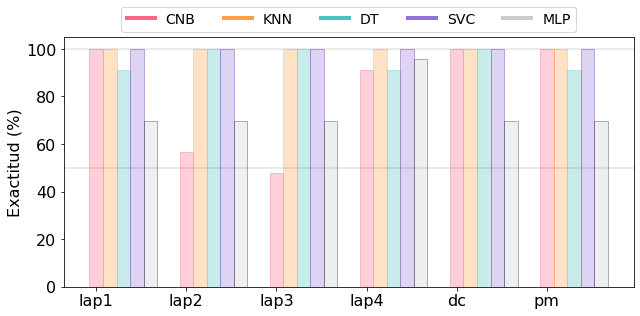

In [175]:
data = [items_acc['CNB'], items_acc['KNN'], items_acc['DT'], items_acc['SVC'], items_acc['MLP']]
X = np.arange(6)
fig, ax = plt.subplots(figsize=(9,4.5))

width = 0.15
ax.bar(X + (width * 0), data[0], color = '#ff6384', width =width, alpha=0.3, edgecolor = "indianred")
ax.bar(X + (width * 1), data[1], color = '#ff9f40', width = width, alpha=0.3, edgecolor='#ff9f40')
ax.bar(X + (width * 2), data[2], color = '#4bc0c0', width = width, alpha = 0.3, edgecolor='#4bc0c0')
ax.bar(X + (width * 3), data[3], color = 'mediumpurple', width = width, alpha = 0.3, edgecolor='indigo'  )
ax.bar(X + (width * 4), data[4], color = '#c9cbcf', width = width, alpha = 0.3, edgecolor='black' )

ax.set_xticklabels(labels)
ax.axhline(y=50, color='black', linestyle='-', alpha = 0.1,)
ax.set_ylabel('Exactitud (%)', fontsize=16)
ax.tick_params(axis="both", labelsize=16)


plt.axhline(y=100, color='black', linestyle='-', alpha = 0.1,)

custom_lines = [Line2D([0], [0], color= '#ff6384', lw=4),
                Line2D([0], [0], color= '#ff9f40', lw=4),
                Line2D([0], [0], color= '#4bc0c0', lw=4),
                Line2D([0], [0], color='mediumpurple', lw=4),
                Line2D([0], [0], color='#c9cbcf', lw=4),
               ]

ax.legend(custom_lines, ['CNB', 'KNN', 'DT', 'SVC', 'MLP'],  bbox_to_anchor=(0.5, 1.15), prop={'size': 14}, ncol=5, loc=9,)
fig.tight_layout()

save_fig("resultados_modelos", "./", tight_layout=True, fig_extension="pdf")

## Rendimiento redes neuronales

Saving figure resultados_modelos


C:\ProgramData\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


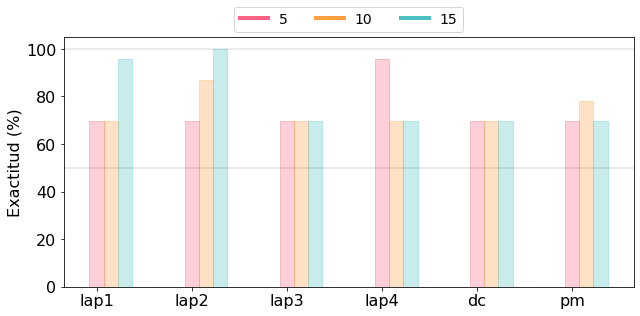

In [186]:
st_5 = [69.57, 69.57, 69.57, 95.65, 69.57, 69.57,]
st_10 = [69.57, 86.96, 69.57, 69.57, 69.57, 78.26,]
st_15 = [95.65, 100.00, 69.57, 69.57, 69.57	, 69.57,]

data = [st_5, st_10, st_15]
X = np.arange(6)
fig, ax = plt.subplots(figsize=(9,4.5))

width = 0.15
ax.bar(X + (width * 0), data[0], color = '#ff6384', width =width, alpha=0.3, edgecolor = "indianred")
ax.bar(X + (width * 1), data[1], color = '#ff9f40', width = width, alpha=0.3, edgecolor='#ff9f40')
ax.bar(X + (width * 2), data[2], color = '#4bc0c0', width = width, alpha = 0.3, edgecolor='#4bc0c0')

ax.set_xticklabels(labels)
ax.axhline(y=50, color='black', linestyle='-', alpha = 0.1,)
ax.set_ylabel('Exactitud (%)', fontsize=16)
ax.tick_params(axis="both", labelsize=16)


plt.axhline(y=100, color='black', linestyle='-', alpha = 0.1,)

custom_lines = [Line2D([0], [0], color= '#ff6384', lw=4),
                Line2D([0], [0], color= '#ff9f40', lw=4),
                Line2D([0], [0], color= '#4bc0c0', lw=4),
               ]

ax.legend(custom_lines, ['5', '10', '15', ],  bbox_to_anchor=(0.5, 1.15), prop={'size': 14}, ncol=5, loc=9,)
fig.tight_layout()

save_fig("resultados_modelos", "./", tight_layout=True, fig_extension="pdf")

In [76]:
items_acc['lap1']

[100.0, 100.0, 91.3, 100.0, 69.57]

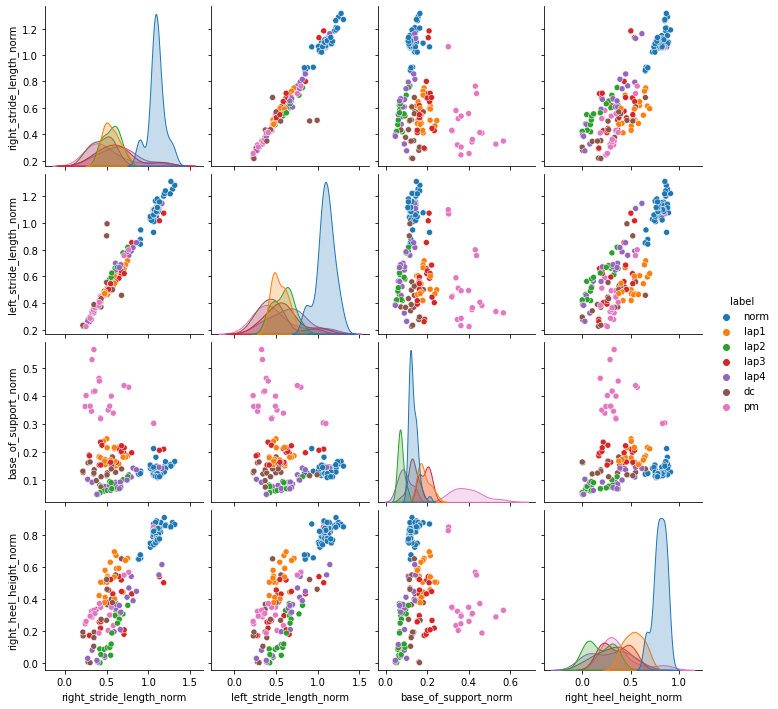

In [18]:
sns_plot = sns.pairplot(spatiotemporal[['label', 'right_stride_length_norm', 'left_stride_length_norm', 
                                        'base_of_support_norm', 'right_heel_height_norm']],hue='label')

Saving figure st_correlactiones


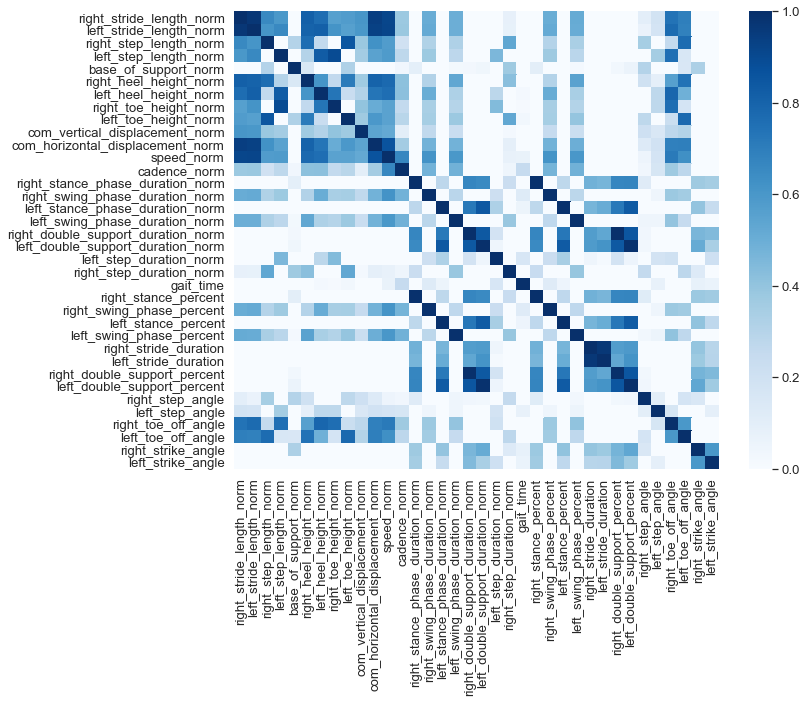

In [19]:
plt.figure(figsize=(12, 10))

sns.set(font_scale=1.2)

sns.heatmap(spatiotemporal.corr(method='spearman'), vmax=1, vmin=0, cmap='Blues')

save_fig("st_correlactiones", "./", tight_layout=True, fig_extension="pdf")

In [16]:
spatiotemporal.drop(['subject', 'record', 'label'], axis=1).columns

Index(['right_stride_length_norm', 'left_stride_length_norm',
       'right_step_length_norm', 'left_step_length_norm',
       'base_of_support_norm', 'right_heel_height_norm',
       'left_heel_height_norm', 'right_toe_height_norm',
       'left_toe_height_norm', 'com_vertical_displacement_norm',
       'com_horizontal_displacement_norm', 'speed_norm', 'cadence_norm',
       'right_stance_phase_duration_norm', 'right_swing_phase_duration_norm',
       'left_stance_phase_duration_norm', 'left_swing_phase_duration_norm',
       'right_double_support_duration_norm',
       'left_double_support_duration_norm', 'left_step_duration_norm',
       'right_step_duration_norm', 'gait_time', 'right_stance_percent',
       'right_swing_phase_percent', 'left_stance_percent',
       'left_swing_phase_percent', 'right_stride_duration',
       'left_stride_duration', 'right_double_support_percent',
       'left_double_support_percent', 'right_step_angle', 'left_step_angle',
       'right_toe_off_angle

In [17]:
correlated = ['com_horizontal_displacement_norm', 'speed', 'right_swing_phase_duration_norm', 'left_swing_phase_duration_norm',
'left_stance_phase_duration_norm', 'right_stance_phase_duration_norm', 'left_double_support_duration_norm',
 'right_double_support_duration_norm'
]

### Cinemáticas

In [18]:
range_vars = list(filter(lambda x: 'Range' in x, kinematics.columns.tolist()))
range_vars.append('label')
kinematics[range_vars]

,right_pelvis_tilt_Range,left_pelvis_tilt_Range,right_pelvis_obliquity_Range,left_pelvis_obliquity_Range,right_pelvis_rotation_Range,left_pelvis_rotation_Range,right_hip_flex_ext_Range,left_hip_flex_ext_Range,right_hip_add_abd_Range,left_hip_add_abd_Range,...,left_knee_rotation_Range,right_ankle_flex_ext_Range,left_ankle_flex_ext_Range,right_ankle_add_abd_Range,left_ankle_add_abd_Range,right_ankle_rotation_Range,left_ankle_rotation_Range,right_foot_rotation_Range,left_foot_rotation_Range,label
0,4.085,4.912,3.964,3.960,39.845,39.223,36.914,38.594,12.769,11.850,...,18.031,25.329,29.988,16.622,11.868,20.596,16.469,27.307,26.265,norm
1,4.154,4.366,3.936,3.734,37.645,35.532,37.335,37.922,12.798,11.979,...,18.204,26.759,31.476,16.808,12.704,21.376,16.821,28.447,26.846,norm
2,3.880,4.175,4.318,4.343,39.798,39.385,36.474,37.255,12.281,11.219,...,16.034,25.457,29.911,18.461,12.112,19.287,15.494,27.029,24.059,norm
3,3.885,3.984,4.078,4.081,40.538,37.607,36.664,36.967,12.284,11.946,...,17.147,24.194,30.798,18.094,12.533,20.451,17.735,26.417,28.053,norm
4,3.894,4.066,4.085,4.169,38.374,40.658,35.849,37.136,12.241,11.353,...,15.871,24.048,28.963,19.762,15.790,19.430,17.065,27.594,25.915,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7.722,7.723,5.084,5.428,130.592,130.254,16.608,17.995,5.773,6.857,...,10.565,22.170,10.199,8.149,13.078,13.305,12.007,20.315,21.458,lap4
164,3.701,3.855,5.601,5.728,128.753,129.582,22.345,21.830,6.272,6.500,...,8.007,17.913,14.915,10.854,9.379,12.147,11.589,15.581,13.932,dc
165,4.144,4.012,6.140,5.615,93.752,91.389,23.747,21.477,7.364,6.212,...,9.439,18.716,19.593,10.984,9.744,11.548,8.675,15.844,9.890,dc
166,3.243,3.313,8.677,8.541,115.629,114.401,16.327,14.521,7.511,6.252,...,10.056,14.611,14.836,7.945,7.041,10.590,11.676,14.455,18.000,pm


In [19]:
kin_means = kinematics[range_vars].groupby('label').mean().T.round(2).reset_index()
kin_stds = kinematics[range_vars].groupby('label').std().T.round(2).reset_index()
kin_stats = pd.merge(kin_means, kin_stds, on="index").reset_index()
kin_stats['norm'] = kin_stats.apply(lambda row: str(row.norm_x) + " + " + str(row.norm_y) , axis=1)
kin_stats['lap1'] = kin_stats.apply(lambda row: str(row.lap1_x) + " + " + str(row.lap1_y) , axis=1)
kin_stats['lap2'] = kin_stats.apply(lambda row: str(row.lap2_x) + " + " + str(row.lap2_y) , axis=1)
kin_stats['lap3'] = kin_stats.apply(lambda row: str(row.lap3_x) + " + " + str(row.lap3_y) , axis=1)
kin_stats['lap4'] = kin_stats.apply(lambda row: str(row.lap4_x) + " + " + str(row.lap4_y) , axis=1)
kin_stats['dc'] = kin_stats.apply(lambda row: str(row.dc_x) + " + " + str(row.dc_y) , axis=1)
kin_stats['pm'] = kin_stats.apply(lambda row: str(row.pm_x) + " + " + str(row.pm_y) , axis=1)
kin_stats[["index", "norm", "lap1", "lap2", "lap3", "lap4", "dc", "pm"]]

label,index,norm,lap1,lap2,lap3,lap4,dc,pm
0,right_pelvis_tilt_Range,4.65 + 1.2,6.72 + 1.87,6.7 + 2.82,8.65 + 3.73,8.76 + 4.53,4.42 + 0.96,3.99 + 0.87
1,left_pelvis_tilt_Range,4.4 + 1.35,6.31 + 1.69,6.78 + 2.87,8.15 + 3.16,8.81 + 4.58,4.55 + 1.18,3.88 + 0.62
2,right_pelvis_obliquity_Range,6.14 + 2.97,7.31 + 1.98,7.11 + 1.44,7.24 + 2.13,6.54 + 1.77,6.82 + 1.21,8.89 + 1.59
3,left_pelvis_obliquity_Range,5.99 + 2.86,7.0 + 1.86,7.14 + 1.41,6.98 + 2.27,6.74 + 1.7,6.94 + 1.25,8.88 + 1.54
4,right_pelvis_rotation_Range,35.76 + 8.19,93.09 + 28.39,84.99 + 24.11,92.23 + 31.9,84.45 + 30.63,105.55 + 24.93,96.64 + 25.54
5,left_pelvis_rotation_Range,35.17 + 12.44,86.9 + 22.98,84.6 + 22.5,87.43 + 31.46,84.63 + 28.89,109.05 + 27.13,94.35 + 26.65
6,right_hip_flex_ext_Range,38.23 + 3.27,26.64 + 4.43,21.3 + 6.57,27.08 + 7.75,28.67 + 10.76,23.9 + 6.7,20.82 + 8.9
7,left_hip_flex_ext_Range,41.9 + 16.47,24.39 + 19.14,27.57 + 7.15,26.82 + 12.17,27.77 + 10.29,26.3 + 8.4,21.56 + 10.72
8,right_hip_add_abd_Range,15.19 + 4.13,11.15 + 3.46,7.91 + 2.81,11.66 + 3.41,10.73 + 4.93,9.72 + 4.17,8.27 + 2.9
9,left_hip_add_abd_Range,16.82 + 8.21,9.84 + 7.66,11.7 + 4.12,10.56 + 5.49,11.85 + 4.25,10.75 + 4.85,9.24 + 4.17


In [20]:

kinematics[range_vars]

,right_pelvis_tilt_Range,left_pelvis_tilt_Range,right_pelvis_obliquity_Range,left_pelvis_obliquity_Range,right_pelvis_rotation_Range,left_pelvis_rotation_Range,right_hip_flex_ext_Range,left_hip_flex_ext_Range,right_hip_add_abd_Range,left_hip_add_abd_Range,...,left_knee_rotation_Range,right_ankle_flex_ext_Range,left_ankle_flex_ext_Range,right_ankle_add_abd_Range,left_ankle_add_abd_Range,right_ankle_rotation_Range,left_ankle_rotation_Range,right_foot_rotation_Range,left_foot_rotation_Range,label
0,4.085,4.912,3.964,3.960,39.845,39.223,36.914,38.594,12.769,11.850,...,18.031,25.329,29.988,16.622,11.868,20.596,16.469,27.307,26.265,norm
1,4.154,4.366,3.936,3.734,37.645,35.532,37.335,37.922,12.798,11.979,...,18.204,26.759,31.476,16.808,12.704,21.376,16.821,28.447,26.846,norm
2,3.880,4.175,4.318,4.343,39.798,39.385,36.474,37.255,12.281,11.219,...,16.034,25.457,29.911,18.461,12.112,19.287,15.494,27.029,24.059,norm
3,3.885,3.984,4.078,4.081,40.538,37.607,36.664,36.967,12.284,11.946,...,17.147,24.194,30.798,18.094,12.533,20.451,17.735,26.417,28.053,norm
4,3.894,4.066,4.085,4.169,38.374,40.658,35.849,37.136,12.241,11.353,...,15.871,24.048,28.963,19.762,15.790,19.430,17.065,27.594,25.915,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7.722,7.723,5.084,5.428,130.592,130.254,16.608,17.995,5.773,6.857,...,10.565,22.170,10.199,8.149,13.078,13.305,12.007,20.315,21.458,lap4
164,3.701,3.855,5.601,5.728,128.753,129.582,22.345,21.830,6.272,6.500,...,8.007,17.913,14.915,10.854,9.379,12.147,11.589,15.581,13.932,dc
165,4.144,4.012,6.140,5.615,93.752,91.389,23.747,21.477,7.364,6.212,...,9.439,18.716,19.593,10.984,9.744,11.548,8.675,15.844,9.890,dc
166,3.243,3.313,8.677,8.541,115.629,114.401,16.327,14.521,7.511,6.252,...,10.056,14.611,14.836,7.945,7.041,10.590,11.676,14.455,18.000,pm


Saving figure kin_correlactiones


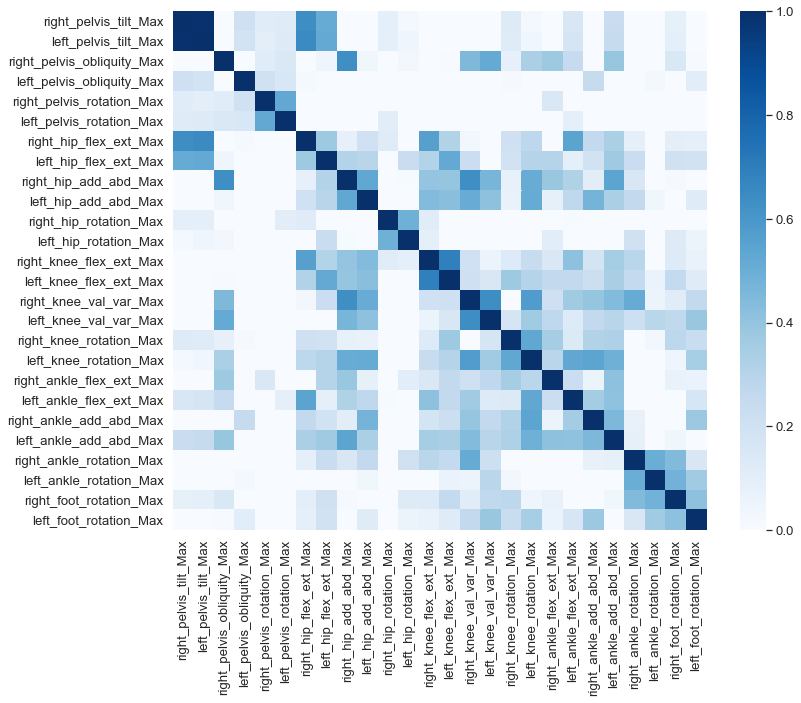

In [21]:
range_vars = list(filter(lambda x: 'Max' in x, kinematics.columns.tolist()))

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.2)

sns.heatmap(kinematics[range_vars].corr(method='spearman'), vmax=1, vmin=0, cmap='Blues')

save_fig("kin_correlactiones", "./", tight_layout=True, fig_extension="pdf")

<AxesSubplot:>

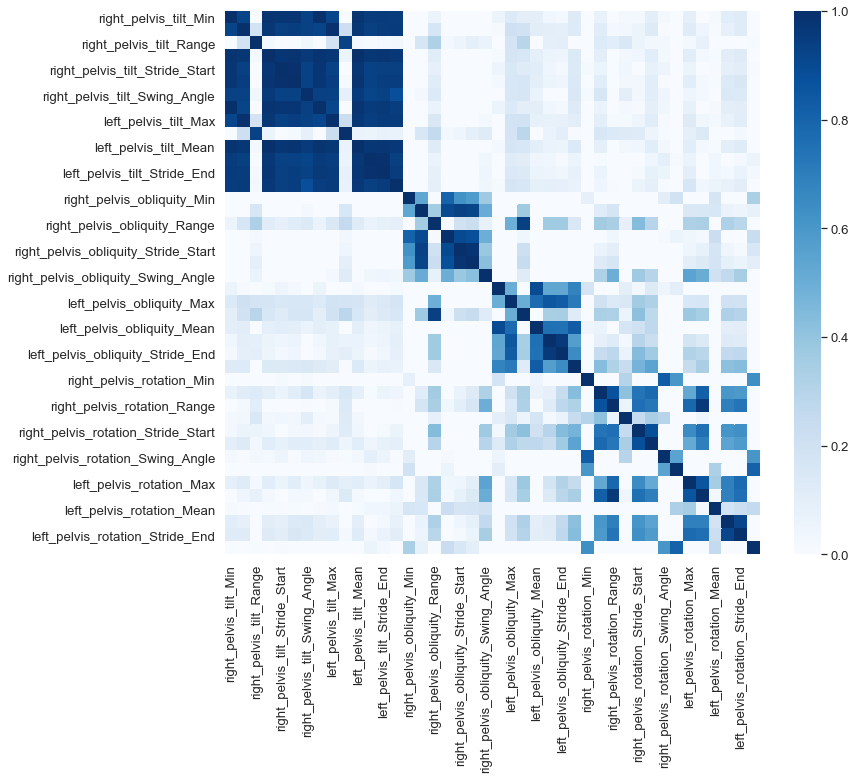

In [22]:
knee_vars = list(filter(lambda x: 'pelvis' in x, kinematics.columns.tolist()))

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.2)

sns.heatmap(kinematics[knee_vars].corr(method='spearman'), vmax=1, vmin=0, cmap='Blues')

In [23]:
def spearm_corr_pairs (data, thr):
    corr = data.corr(method='spearman')
    corr = corr.unstack()
    so = corr[corr > thr]
    so = set(tuple(sorted(t)) for t in so.index.tolist())
    so = [x for x in so if x[0] != x[1]]
    return so

In [24]:
kin_no_labels = kinematics.drop(['subject', 'record', 'label'], axis=1)
so1 = spearm_corr_pairs(kin_no_labels, 0.9)

In [25]:
corr_diff_extr = [x for x in so1 if  ("".join(x[0].split("_")[1:])) == ("".join(x[1].split("_")[1:]))]
corr_diff_extr

[('left_pelvis_tilt_Mean', 'right_pelvis_tilt_Mean'),
 ('left_pelvis_obliquity_Range', 'right_pelvis_obliquity_Range'),
 ('left_pelvis_tilt_Stride_Start', 'right_pelvis_tilt_Stride_Start'),
 ('left_pelvis_rotation_Range', 'right_pelvis_rotation_Range'),
 ('left_pelvis_tilt_Stride_End', 'right_pelvis_tilt_Stride_End'),
 ('left_pelvis_tilt_Min', 'right_pelvis_tilt_Min'),
 ('left_pelvis_tilt_Max', 'right_pelvis_tilt_Max'),
 ('left_pelvis_tilt_Range', 'right_pelvis_tilt_Range')]

In [26]:
for kin_pair in corr_diff_extr:
    cols = [kin_pair[0], kin_pair[1]]
    kinematics[kin_pair[0][kin_pair[0].find("_") + 1:]] = kinematics[cols].mean(axis=1)
    kinematics.drop(cols, inplace=True, axis=1)

In [40]:
kin_no_labels = kinematics.drop(['subject', 'record', 'label'], axis=1)
so2 = spearm_corr_pairs(kin_no_labels, 0.9)

In [41]:
len(so2)

0

In [35]:
kin_correlated = list(set(list(zip(*so2))[1]))

In [36]:
kinematics.drop(kin_correlated, inplace=True, axis=1)

In [37]:
kinematics

,subject,record,label,left_pelvis_tilt_Swing_Angle,right_pelvis_obliquity_Min,right_pelvis_obliquity_Max,right_pelvis_obliquity_Swing_Angle,left_pelvis_obliquity_Min,left_pelvis_obliquity_Max,left_pelvis_obliquity_Mean,...,right_foot_rotation_Stride_Start,right_foot_rotation_Stride_End,right_foot_rotation_Swing_Angle,left_foot_rotation_Min,left_foot_rotation_Max,left_foot_rotation_Range,left_foot_rotation_Stride_End,pelvis_obliquity_Range,pelvis_rotation_Range,pelvis_tilt_Range
0,subject_01,rec_01,norm,9.350,-2.868,1.096,-2.254,-0.898,3.061,0.994,...,-17.899,-13.335,-5.208,-9.810,16.455,26.265,-5.102,3.9620,39.5340,4.4985
1,subject_01,rec_02,norm,9.571,-2.970,0.966,-2.522,-0.762,2.972,1.124,...,-15.165,-8.896,-3.928,-8.544,18.301,26.846,-1.251,3.8350,36.5885,4.2600
2,subject_01,rec_03,norm,10.541,-2.974,1.345,-1.997,-1.263,3.081,0.970,...,-16.759,-13.414,-6.287,-7.348,16.711,24.059,1.724,4.3305,39.5915,4.0275
3,subject_01,rec_04,norm,9.725,-3.098,0.980,-2.147,-1.037,3.043,1.011,...,-13.697,-9.607,-5.078,-8.449,19.604,28.053,-1.173,4.0795,39.0725,3.9345
4,subject_01,rec_05,norm,10.219,-3.028,1.057,-2.067,-0.920,3.249,1.119,...,-14.112,-10.002,-7.931,-6.522,19.394,25.915,4.191,4.1270,39.5160,3.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,subject_10,rec_13,lap4,14.134,-1.438,3.646,1.067,-3.490,1.938,-1.269,...,-0.704,-0.738,-11.132,-19.370,2.087,21.458,-7.338,5.2560,130.4230,7.7225
164,subject_10,rec_14,dc,10.705,-1.128,4.473,1.336,-4.252,1.476,-1.663,...,-4.325,-4.473,-5.086,-9.331,4.601,13.932,-0.596,5.6645,129.1675,3.7780
165,subject_10,rec_15,dc,-29.517,-0.681,5.460,1.678,-5.070,0.545,-2.372,...,-3.468,-4.931,-5.610,-10.937,-1.046,9.890,-5.027,5.8775,92.5705,4.0780
166,subject_10,rec_16,pm,18.504,-3.672,5.005,1.148,-5.036,3.505,-0.727,...,12.158,11.677,8.058,1.027,19.026,18.000,9.154,8.6090,115.0150,3.2780


In [38]:
so2 = spearm_corr_pairs(kin_no_labels, 0.9)

In [39]:
so2

[('right_knee_rotation_Mean', 'right_knee_rotation_Stride_End'),
 ('left_pelvis_tilt_Swing_Angle', 'pelvis_tilt_Mean'),
 ('left_ankle_flex_ext_Stride_End', 'left_ankle_flex_ext_Stride_Start'),
 ('right_ankle_rotation_Min', 'right_ankle_rotation_Stride_Start'),
 ('pelvis_tilt_Min', 'pelvis_tilt_Stride_Start'),
 ('right_hip_flex_ext_Max', 'right_hip_flex_ext_Mean'),
 ('left_hip_flex_ext_Max', 'left_hip_flex_ext_Stride_End'),
 ('right_knee_rotation_Mean', 'right_knee_rotation_Stride_Start'),
 ('left_hip_rotation_Max', 'left_hip_rotation_Stride_Start'),
 ('left_knee_rotation_Mean', 'left_knee_rotation_Stride_End'),
 ('right_hip_flex_ext_Stride_End', 'right_hip_flex_ext_Stride_Start'),
 ('right_ankle_rotation_Mean', 'right_ankle_rotation_Min'),
 ('right_hip_flex_ext_Max', 'right_hip_flex_ext_Stride_End'),
 ('left_ankle_add_abd_Stride_End', 'left_ankle_add_abd_Stride_Start'),
 ('left_hip_rotation_Stride_End', 'left_hip_rotation_Stride_Start'),
 ('left_knee_rotation_Mean', 'left_knee_rotation